In [1]:
# IMPORT PACKAGES
from package_bfry import *

/Users/brianfry/Documents/GitHub/Bologna/package_bfry/bfry.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2019['Area Statistica'] = income_2019['Area Statistica'].str.upper()


In [ ]:
# HOUSEHOLD SIZE
# map the household size
base_map_2019.explore(column = 'avg_household_size', cmap = 'RdBu_r', tooltip = ('zona_fiu', 'population', 'households', 'avg_household_size'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# explore gyms per 1000
amenities_2019.explore(column = 'gyms_per_1000', cmap = 'RdBu', tooltip = ('zona_fiu', 'population', 'gyms_per_1000'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# airbnb #
# base dataset : airbnb_agg

create_map(base_map_2019, airbnb_agg, 'household', 'airbnb', airbnb)

In [ ]:
# WIFI #
# base dataset : wifi_agg

# map the wifi per capita
create_map(base_map_2019, wifi_agg, 'population', 'hotspot', wifi, quotient = 1000)

In [ ]:
# PARTICIPATORY BUDGET #
# base dataset : budg_geo

    # process data for mapping
# aggregate the count of participative budget projects at the neighborhood level
# TO DO - resolve mixed geometry situation
#budg_agg = 
#gpd.overlay(base_map_2019, budg_geo, how='intersection', keep_geom_type=False) #.groupby('cod_zona').count()
#budg_agg
# rename and subset the data just to the count of the projects per neighborhood
#budg_agg = budg_agg.rename(columns={'Progetto':'project_count'})['project_count']
budg_geo.explore()
    # map the data
#create_map(base_map_2019, budg_agg, 'population', 'project', budg_geo, quotient = 1000)

In [ ]:
# explore traffic per capita at the zone level
transport_2019.explore(column = 'traffic_per_1000', cmap = 'RdBu_r')

In [ ]:
# explore bike parking per capita / household
transport_2019.explore(column = 'bike_parking_per_household', cmap = 'RdBu_r')

In [ ]:
# explore bus stops per capita
transport_2019.explore(column = 'tper_stops_per_1000', cmap = 'RdBu_r')

In [ ]:
# calculate the number of traffic coils per zone to determine the adequacy of this measurement 
base_map_2019.join(traffic_2019_geo.sjoin(base_map_2019[['geometry']]).groupby('index_right')['day_total_traffic'].count()).explore(column = 'day_total_traffic', tooltip= ('day_total_traffic'), cmap = 'RdBu_r')

In [ ]:
# MULTI VARIABLE ANALYSIS #
    # explore and select metrics to use in categorization of Bologna's zones
    # create a dataframe of variables to be analyzed together
        # can add or remove metrics for analysis as needed
        # standardize the data by using z-scores - allows for simple comparison / analysis of above, at, or below average across the city's zones
    # run k-means cluster analysis on the standardized datasets
    # 

In [ ]:
# plot the distribution for each variable to explore variation
for column in all_metrics:
    all_metrics[[column]].plot.hist()

In [2]:
# calculate the z-score to give a more standard frame of rereference across metrics
df_z = (all_metrics - all_metrics.mean())/all_metrics.std()

# invert selected metrics to show inverse relationships more effectively
df_z['inv_avg_household_size'] = df_z['avg_household_size']*-1
df_z.drop(columns=['avg_household_size'])

    # create a subset of just base/socioecon related metrics
df_z_socioecon = df_z[['population', '00-14', '15-29', '30-44', '45-64', '65 e oltre',
       'avg_income', 'workers_per_cap', 'students_per_cap', 'pop_density_km2',
       'inv_avg_household_size']]

    # create a subset of just transport related metrics
df_z_transport = df_z[['incident_per_1000', 'injured_per_1000',
       'injured_per_incident', 'mortality_per_1000', 'traffic_per_1000',
       'incident_per_traffic', 'bike_parking_per_1000', 'bike_m_per_capita',
       'percent_protected_bike', 'tper_stops_per_1000']]

    # create a subset of just amenities related metrics
df_z_amenities = df_z[['p_furn_good',
       'school_per_1000_child', 'furn_per_1000', 'wifi_per_1000',
       'airbnb_per_household', 'gyms_per_1000']]

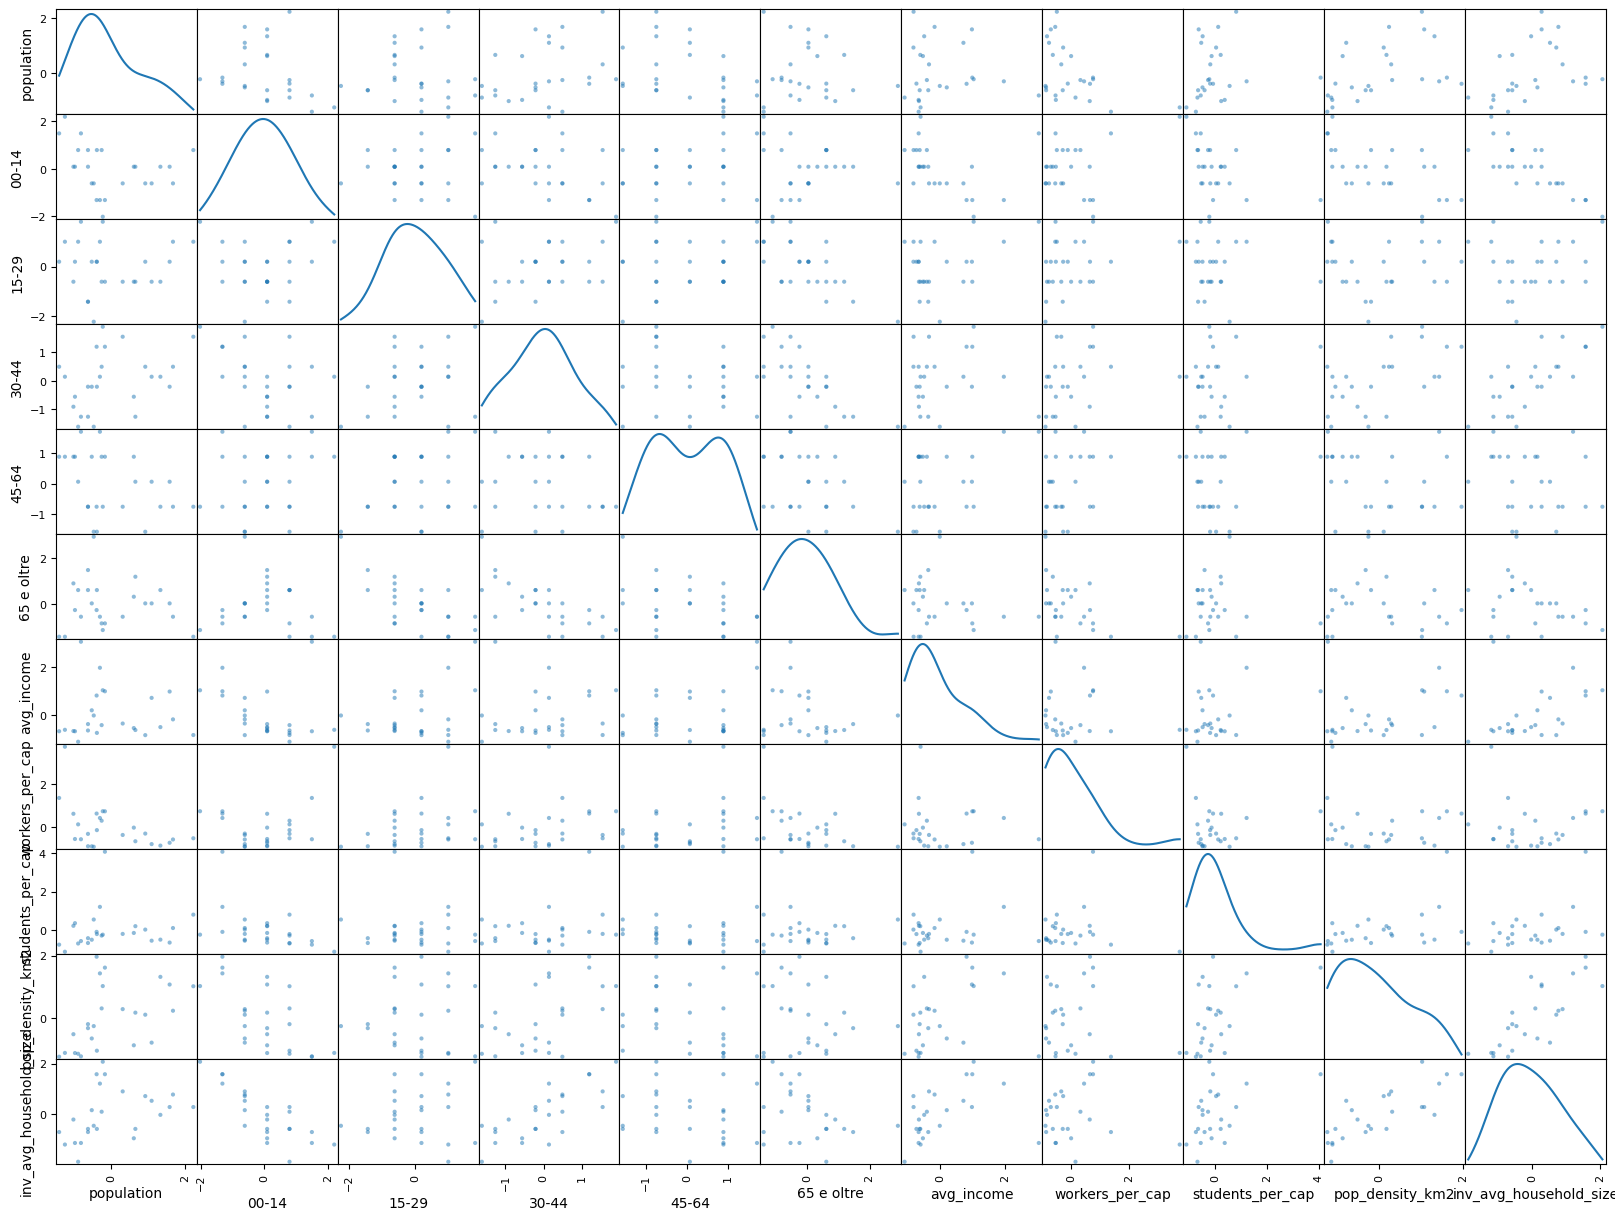

population     00-14     15-29     30-44     45-64  \
population                1.000000 -0.256509  0.024864  0.323711 -0.377612   
00-14                    -0.256509  1.000000  0.077781 -0.372658  0.233759   
15-29                     0.024864  0.077781  1.000000  0.303974  0.290622   
30-44                     0.323711 -0.372658  0.303974  1.000000 -0.165499   
45-64                    -0.377612  0.233759  0.290622 -0.165499  1.000000   
65 e oltre               -0.057557 -0.112848 -0.685188 -0.723502 -0.393220   
avg_income               -0.039010 -0.321175  0.366274  0.084246  0.403591   
workers_per_cap          -0.477619  0.298169  0.323406  0.270976  0.333168   
students_per_cap          0.106167 -0.473959 -0.121988  0.250271  0.122124   
pop_density_km2           0.468902 -0.624981  0.010792  0.577280 -0.208627   
avg_household_size       -0.366493  0.807540 -0.124644 -0.769729  0.200782   
incident_per_1000        -0.307695  0.341058  0.493539  0.213254  0.052591   
injured_per_1000         -0.331483  0.383017  0.511577  0.124777  0.045948   
injured_per_incident     -0.254988  0.286905  0.112396 -0.438442  0.006855   
mortality_per_1000       -0.191213  0.334981  0.045754  0.066814 -0.056696   
traffic_per_1000         -0.779083  0.461529  0.030472 -0.195918  0.449677   
incident_per_traffic      0.803020 -0.178208  0.351573  0.406692 -0.428371   
bike_parking_per_1000    -0.003502 -0.687283  0.298253  0.587165  0.002943   
bike_m_per_capita        -0.503166  0.594431  0.048855 -0.167802  0.177273   
percent_protected_bike    0.062893  0.049393 -0.159534 -0.346757 -0.177293   
tper_stops_per_1000      -0.574377  0.560930  0.404760 -0.373249  0.508895   
p_furn_good              -0.115206  0.293523 -0.003727 -0.264272  0.436976   
school_per_1000_child     0.099301 -0.590627 -0.235485  0.140784  0.023811   
furn_per_1000            -0.271603  0.391139 -0.210882 -0.642052 -0.016133   
wifi_per_1000            -0.033307 -0.549418  0.243095  0.365551  0.253227   
airbnb_per_household     -0.031663 -0.641002  0.428852  0.616663  0.091115   
gyms_per_1000            -0.235911 -0.056460 -0.675955 -0.402323 -0.332722   
inv_avg_household_size    0.366493 -0.807540  0.124644  0.769729 -0.200782   

                        65 e oltre  avg_income  workers_per_cap  \
population               -0.057557   -0.039010        -0.477619   
00-14                    -0.112848   -0.321175         0.298169   
15-29                    -0.685188    0.366274         0.323406   
30-44                    -0.723502    0.084246         0.270976   
45-64                    -0.393220    0.403591         0.333168   
65 e oltre                1.000000   -0.207416        -0.517297   
avg_income               -0.207416    1.000000        -0.059105   
workers_per_cap          -0.517297   -0.059105         1.000000   
students_per_cap         -0.069352    0.217042        -0.021605   
pop_density_km2          -0.161265    0.295014        -0.082974   
avg_household_size        0.326284   -0.392734         0.019807   
incident_per_1000        -0.441742   -0.141348         0.795270   
injured_per_1000         -0.389173   -0.151419         0.751434   
injured_per_incident      0.193340   -0.103989        -0.151320   
mortality_per_1000       -0.162568   -0.304948         0.139837   
traffic_per_1000         -0.148090   -0.108145         0.519225   
incident_per_traffic     -0.231587   -0.083445        -0.095537   
bike_parking_per_1000    -0.335329    0.500577         0.254247   
bike_m_per_capita        -0.155100   -0.529146         0.652587   
percent_protected_bike    0.388584   -0.141382        -0.587460   
tper_stops_per_1000      -0.200213    0.221702         0.402745   
p_furn_good              -0.042034   -0.103142         0.261350   
school_per_1000_child     0.119032    0.308430        -0.129858   
furn_per_1000             0.445251   -0.557837        -0.052601   
wifi_per_1000            -0.267920    0.548903         0.183842   
airbnb_per_househol

In [45]:
# scattter matrix to view distributions and correlations together
pd.plotting.scatter_matrix(df_z_socioecon, diagonal="kde",figsize=(20,15))
plt.show()
#df_z
#hinton(df_z.corr())
df_z.corr()

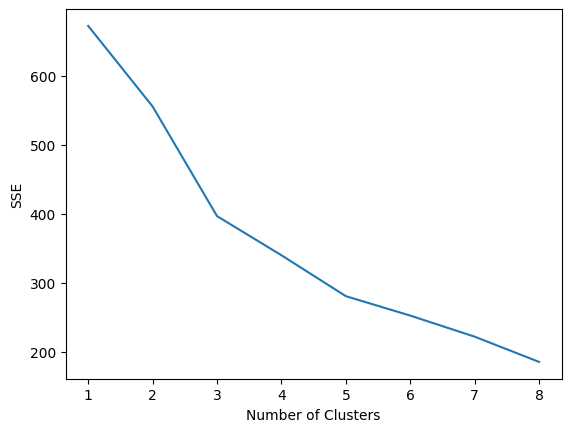

In [40]:
# visual test for best number of clusters
    # should use n-1 where n is the "elbow" of the plot where slope significantly changes
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_z)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [4]:
# display the map of the zones showing the clusters by color and limiting the tooltip to avoid noisy visualization
df_z_clusters_4 = km_cluster_analysis(df_z, 4, base_map_2019)
df_z_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
# display the average z-score (centroids) for each metric across each cluster
# this tells about the character of each cluster
# for interpretation: a more negative/positive number means a cluster is characterized by being more below/above the average across all zones
df_z_clusters_4.centroids

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z, 
                cluster_id = id, 
                metrics = metrics_list)

In [31]:
# display the map of the zones showing the clusters by color and limiting the tooltip to avoid noisy visualization
df_z_clusters_5 = km_cluster_analysis(df_z, 5, base_map_2019)
df_z_clusters_5.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red','purple'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

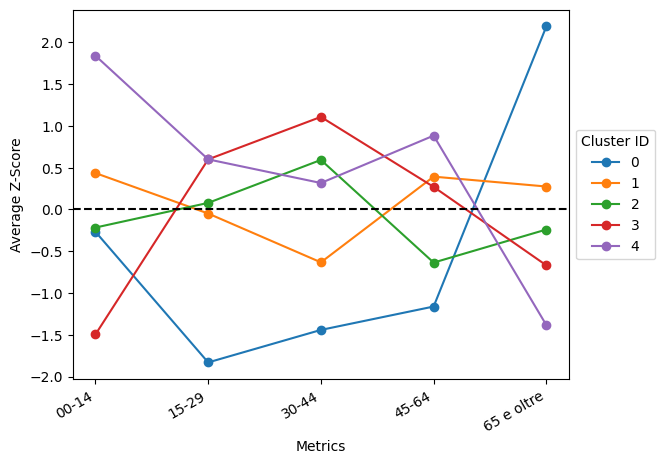

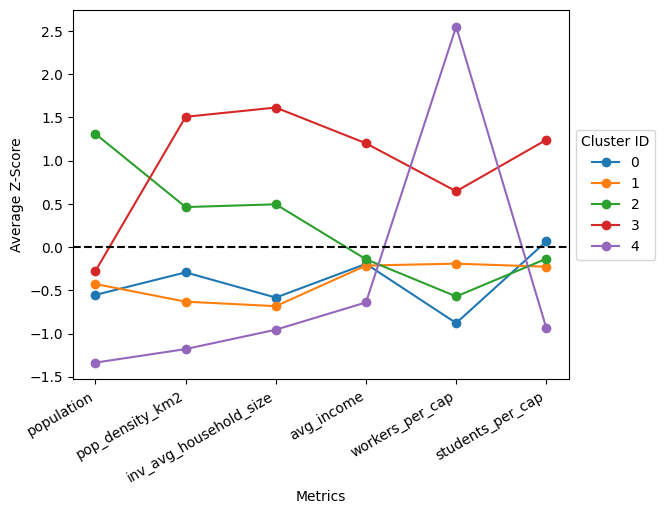

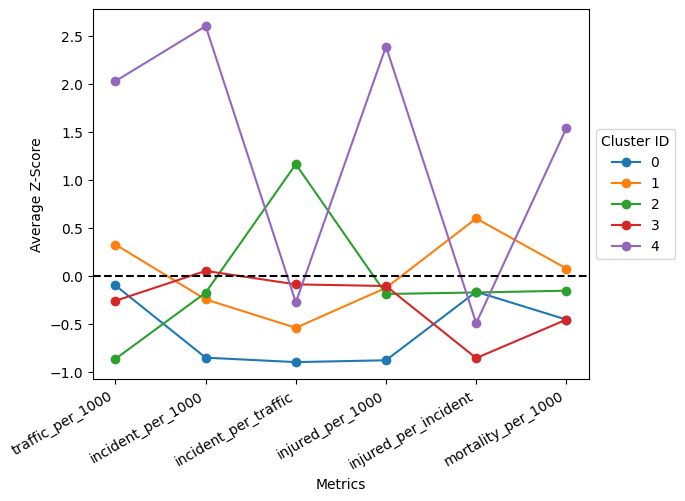

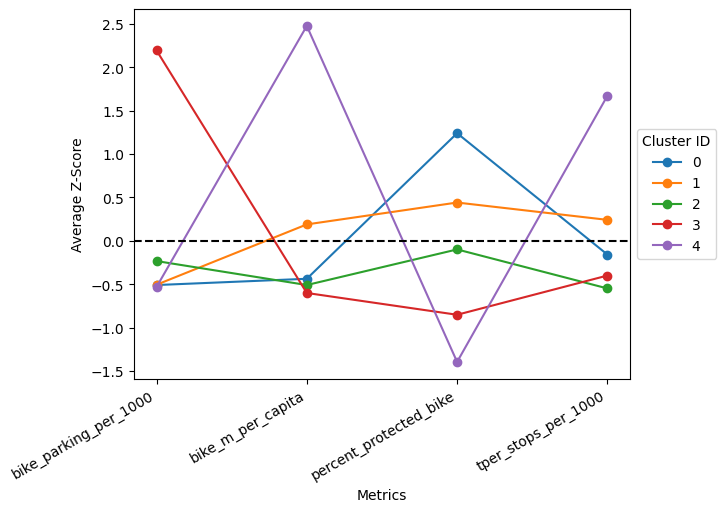

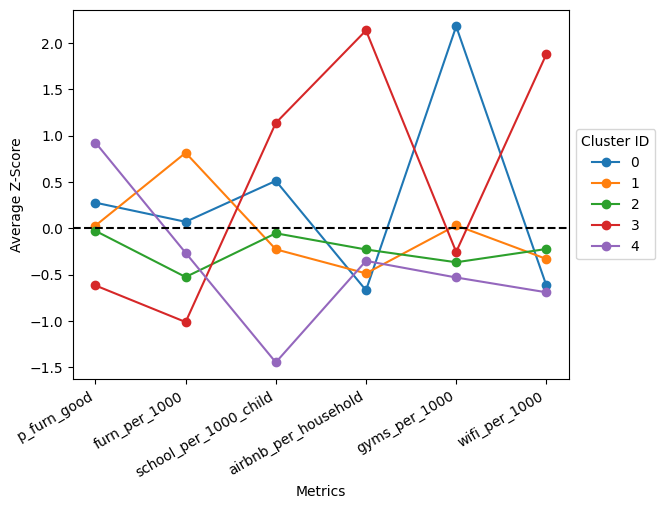

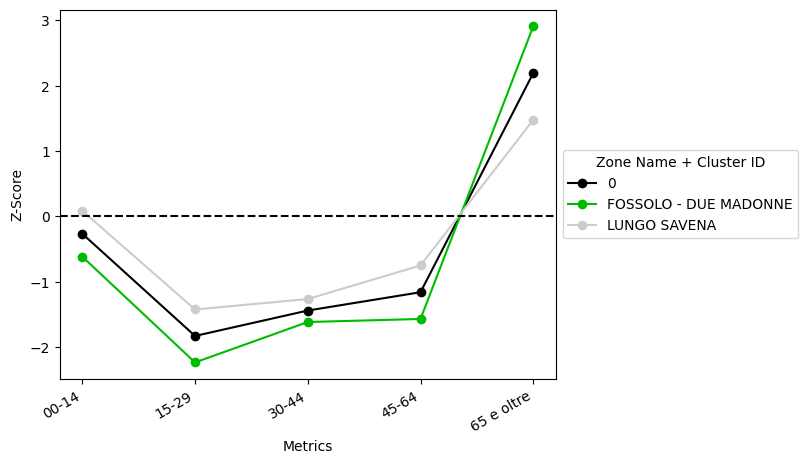

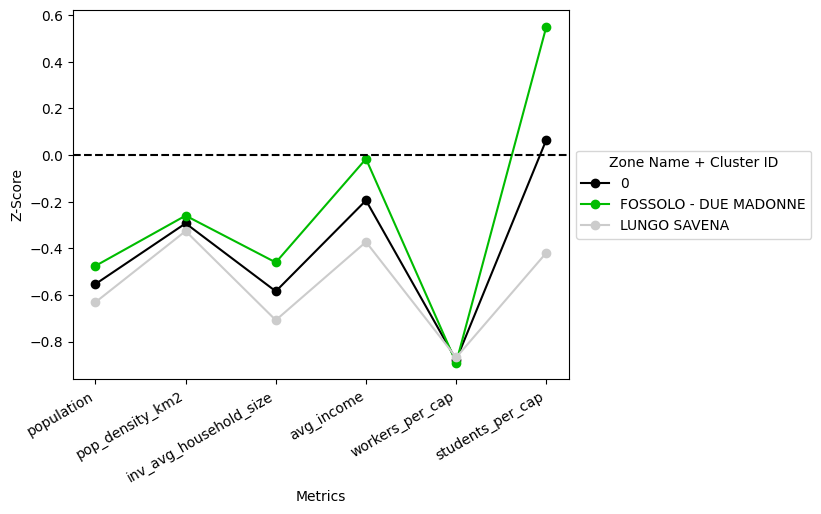

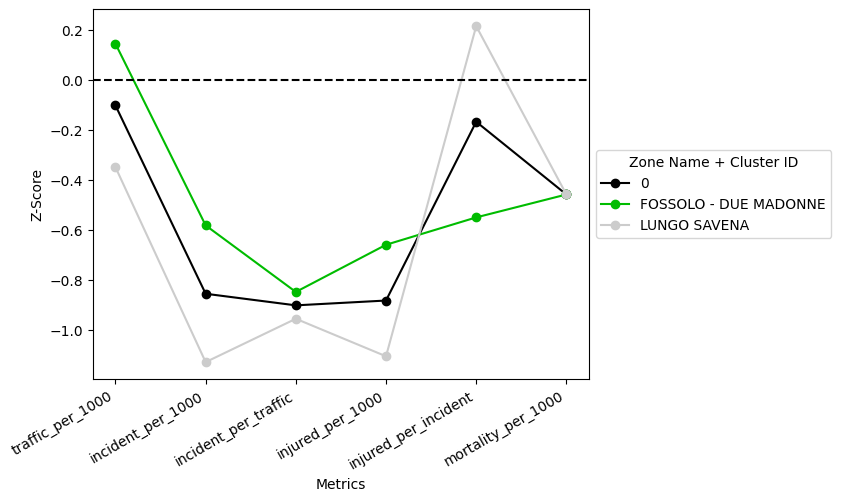

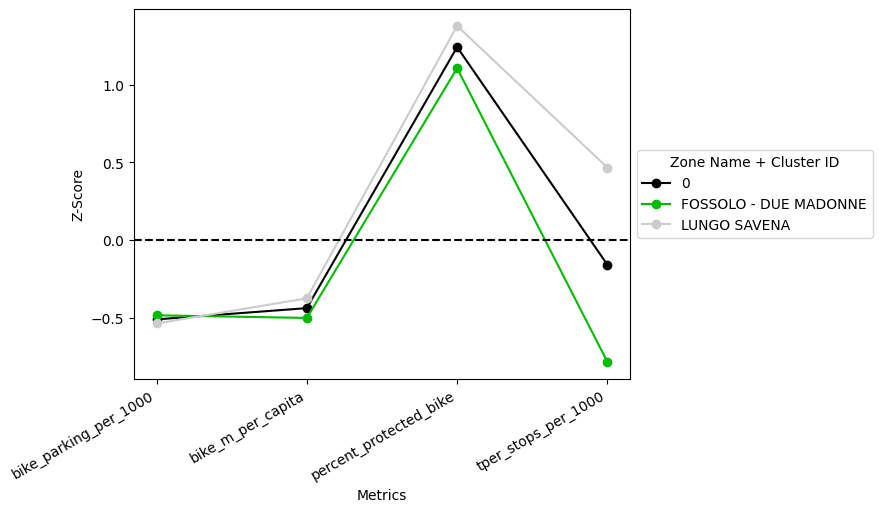

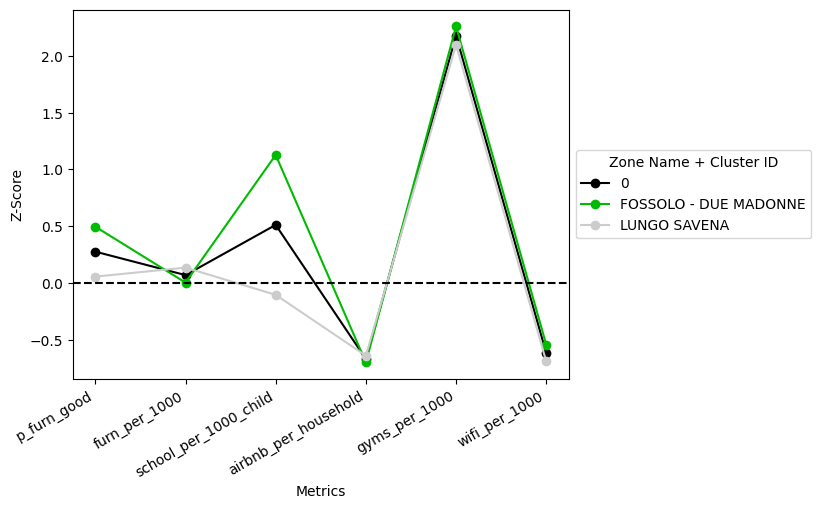

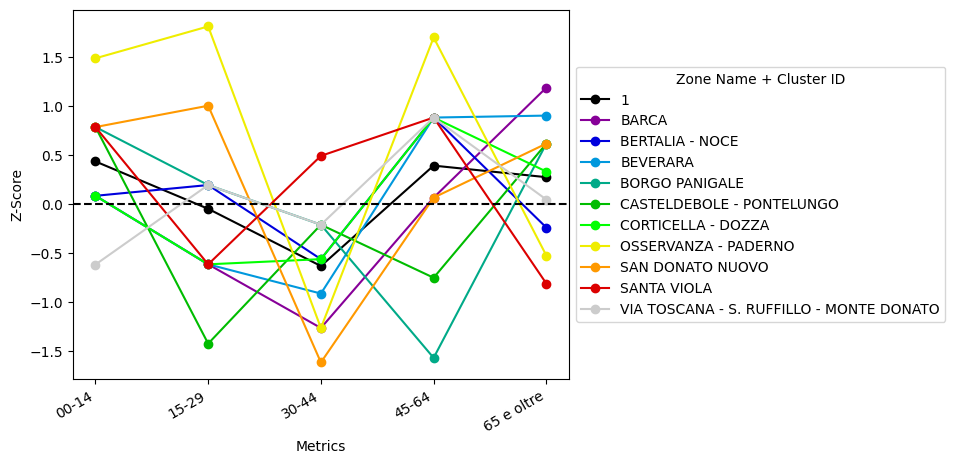

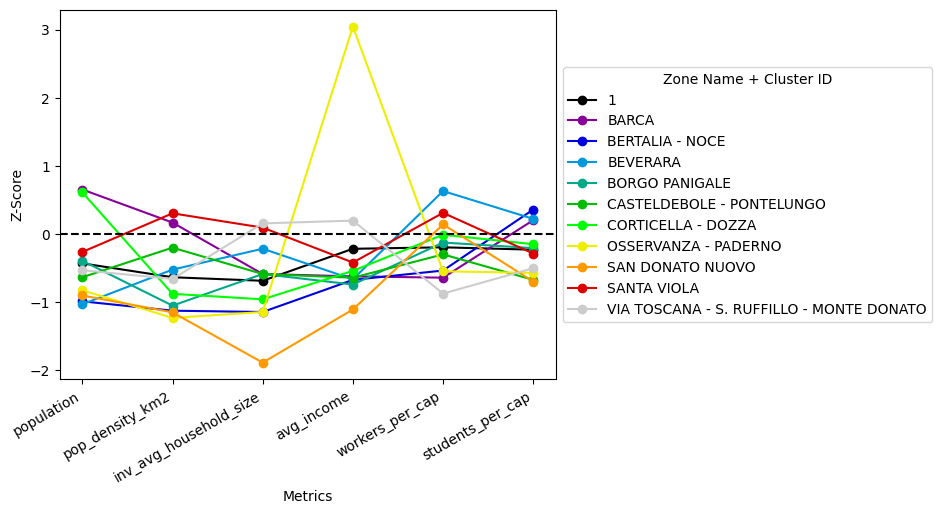

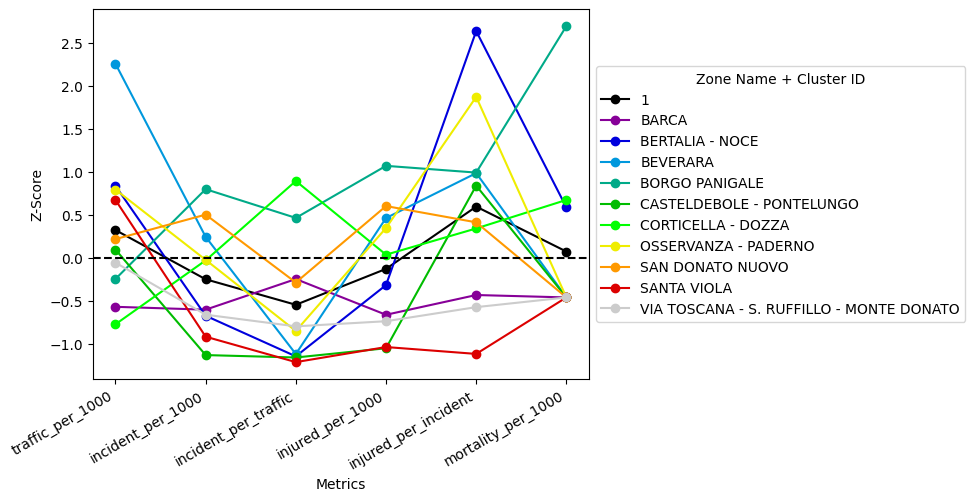

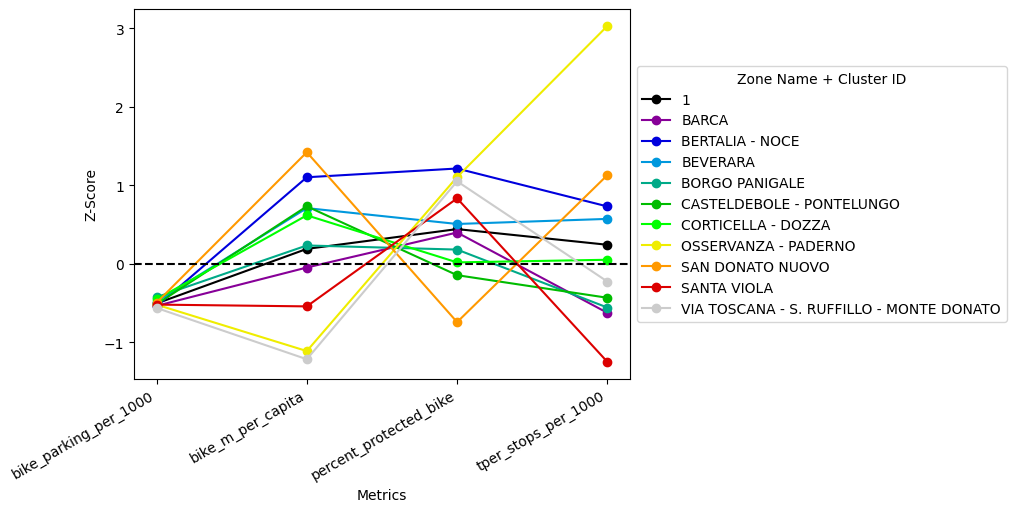

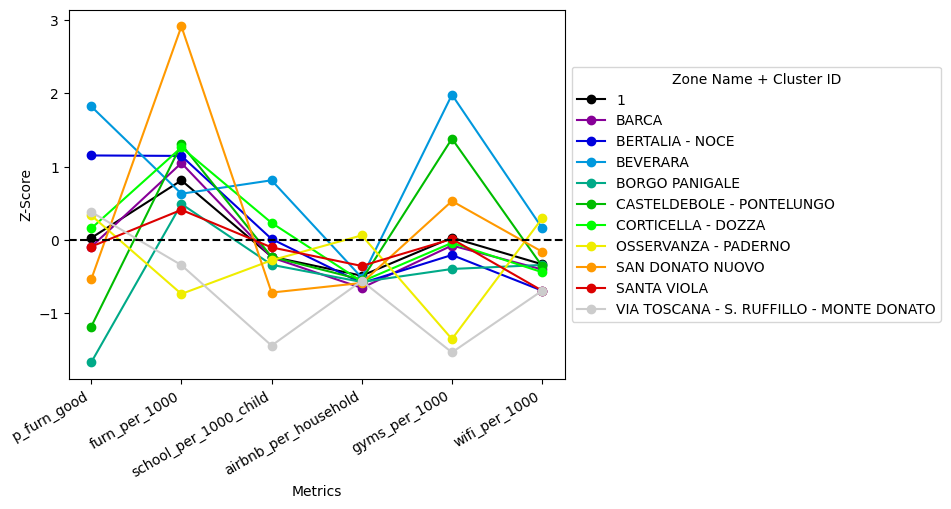

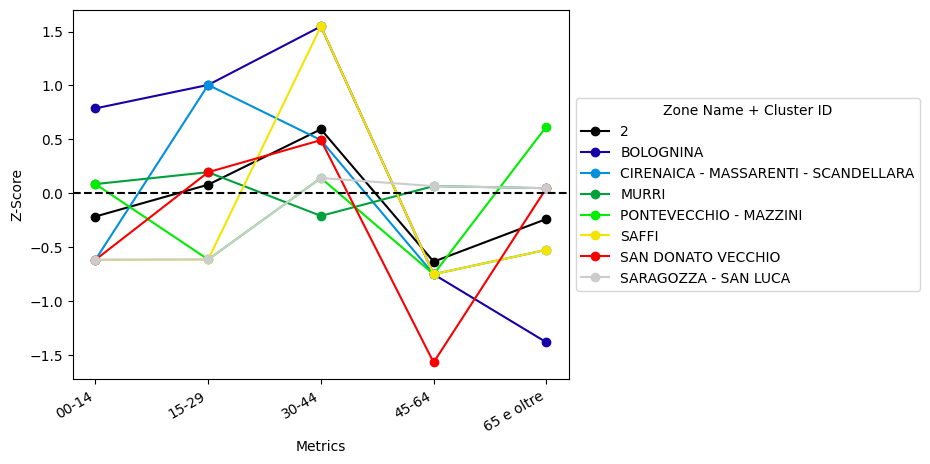

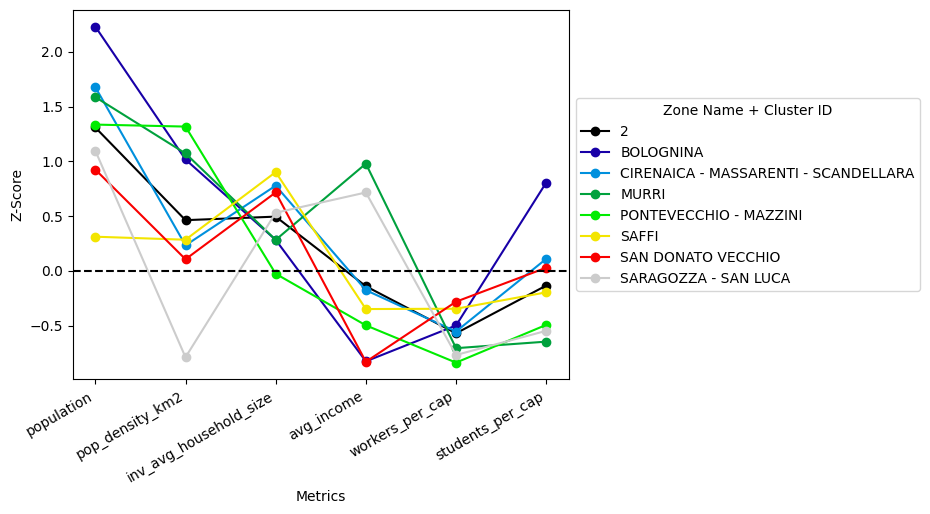

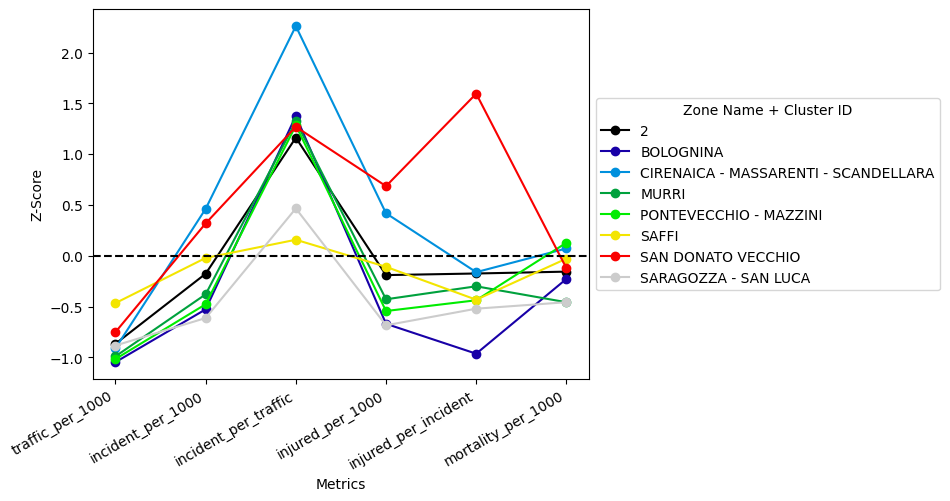

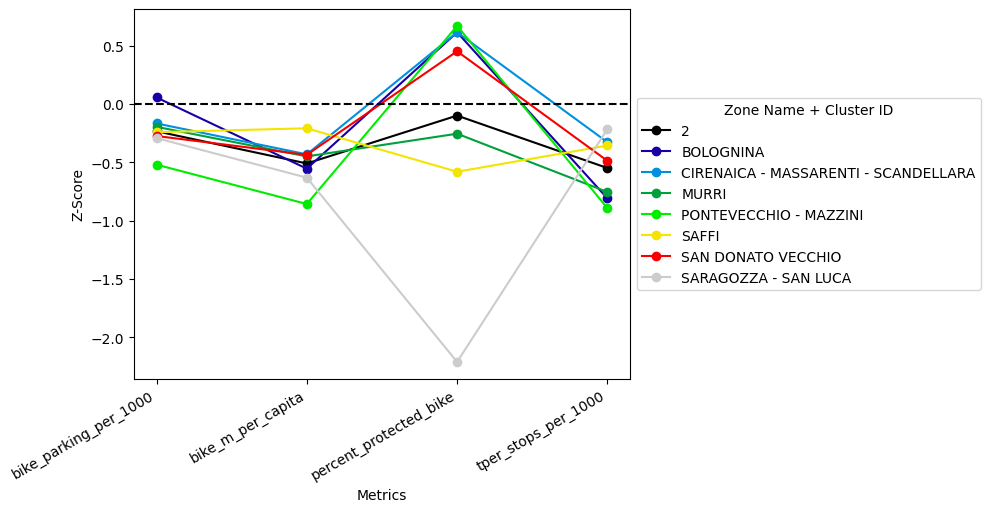

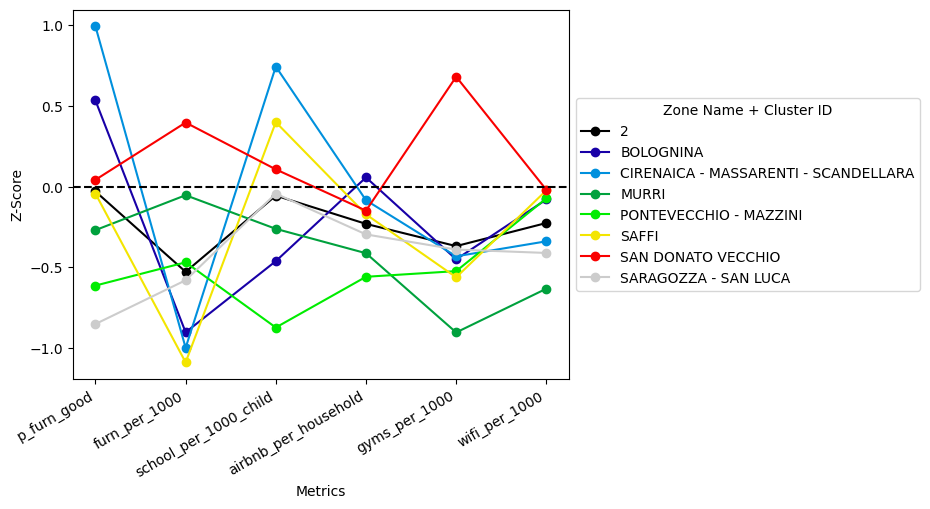

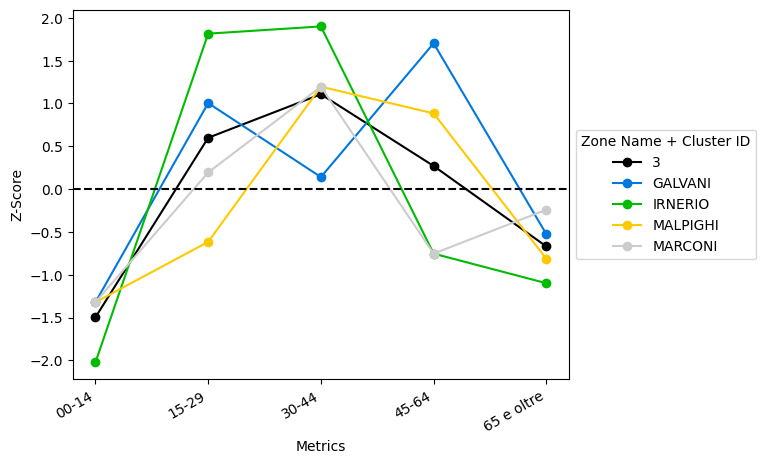

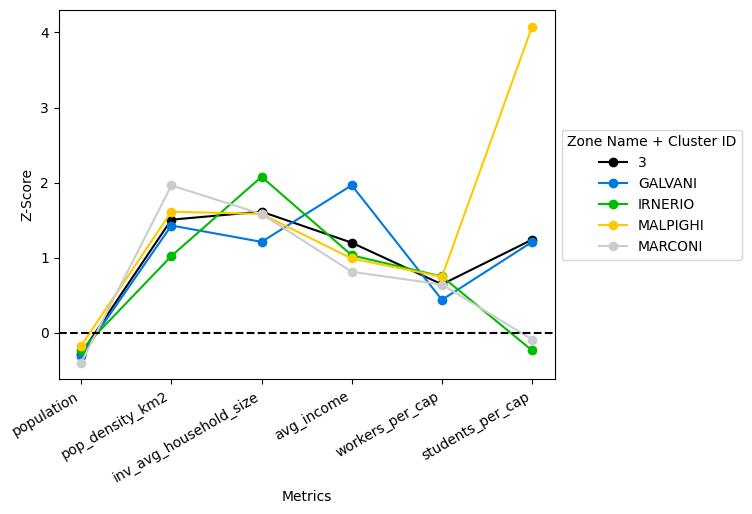

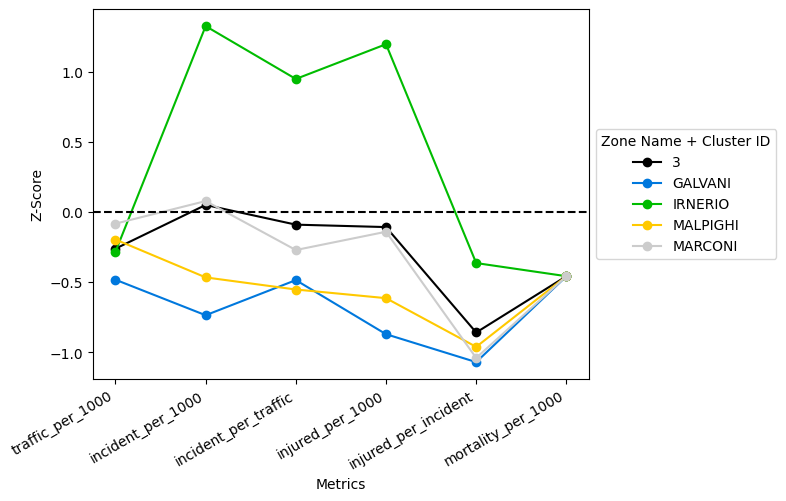

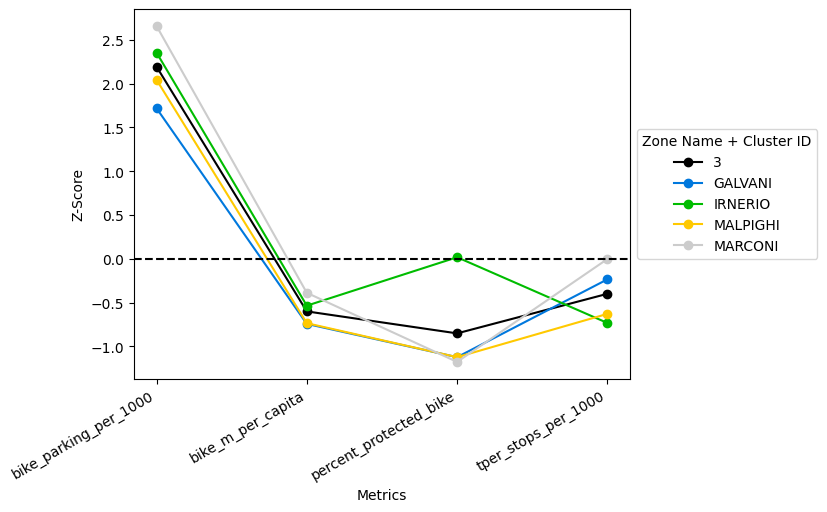

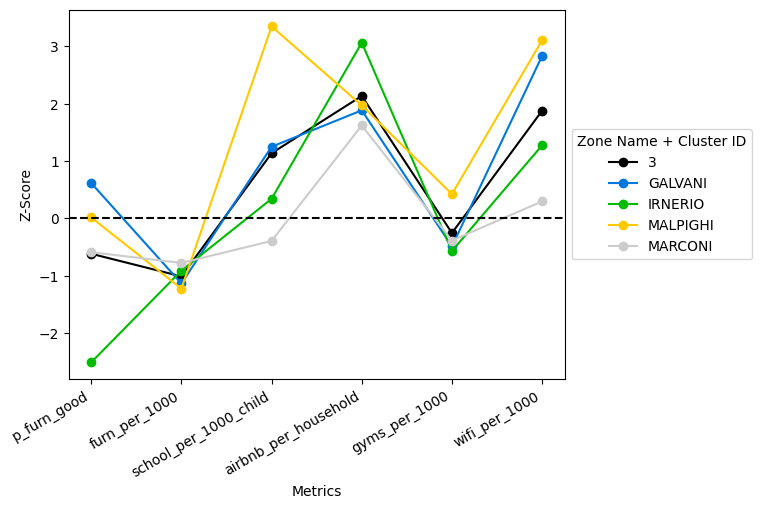

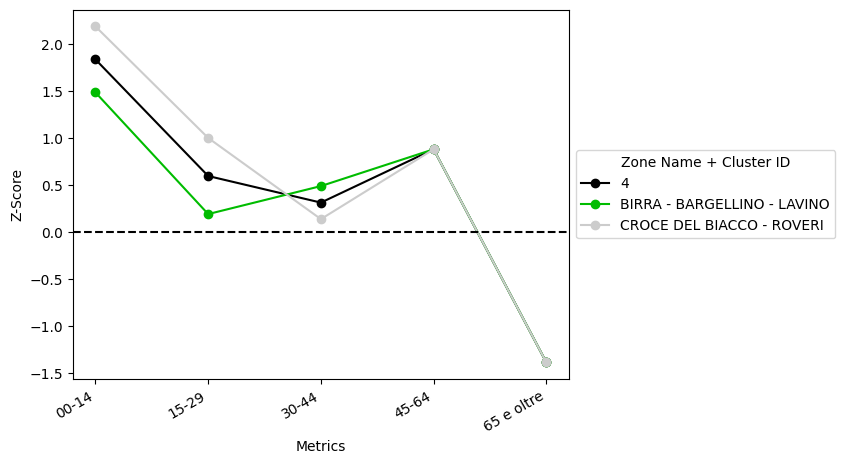

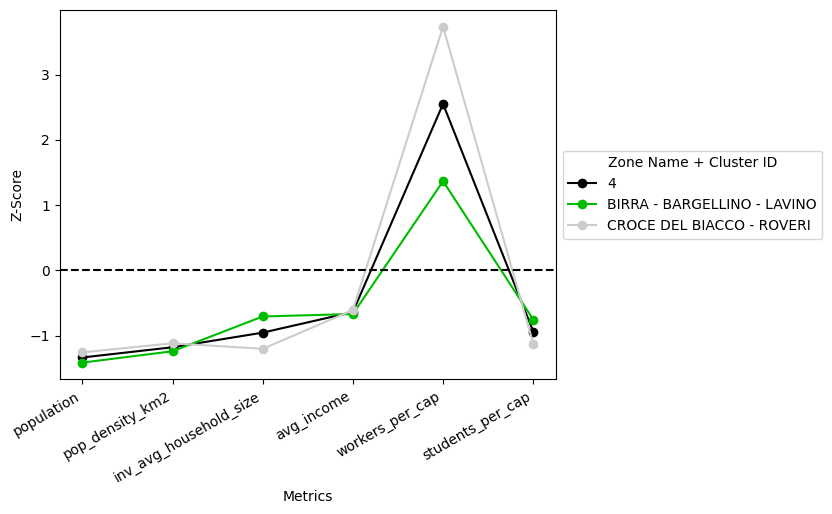

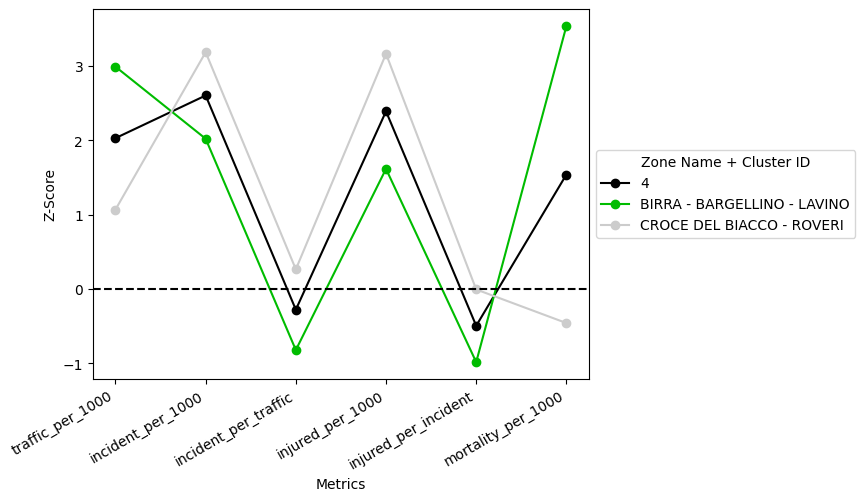

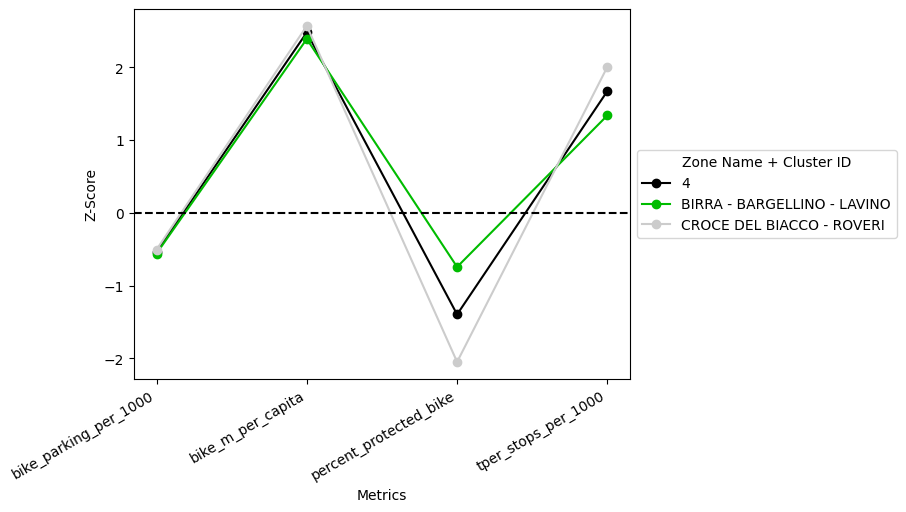

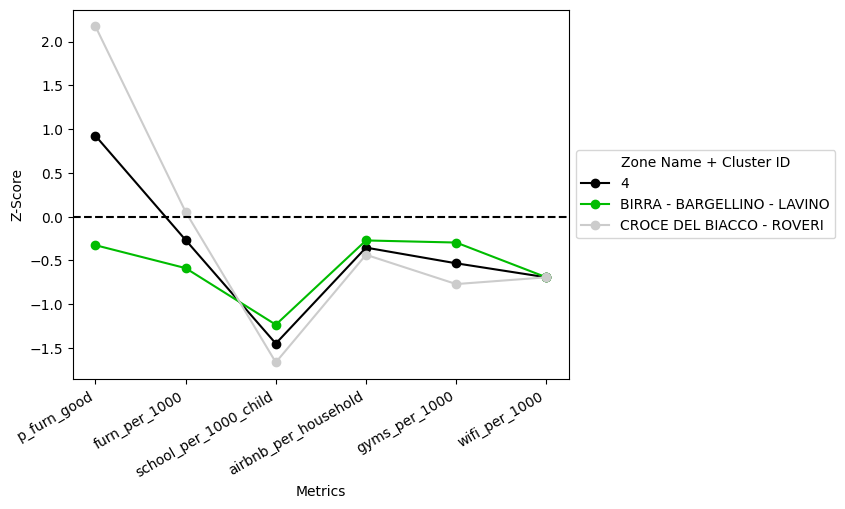

In [32]:
for id in ['x','0','1','2','3','4']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_5, 
                analysis_data = df_z, 
                cluster_id = id, 
                metrics = metrics_list)

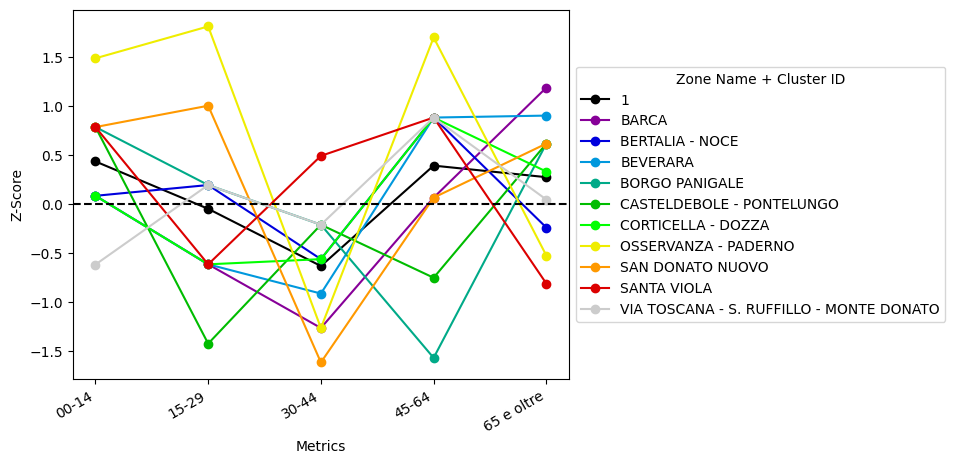

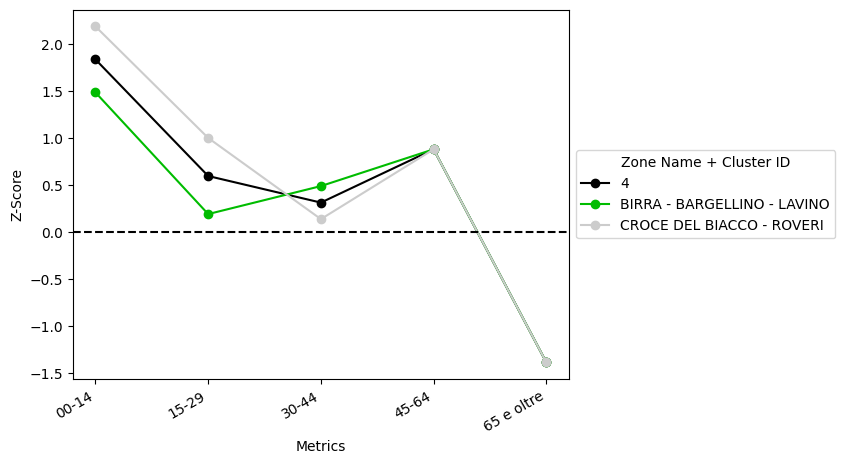

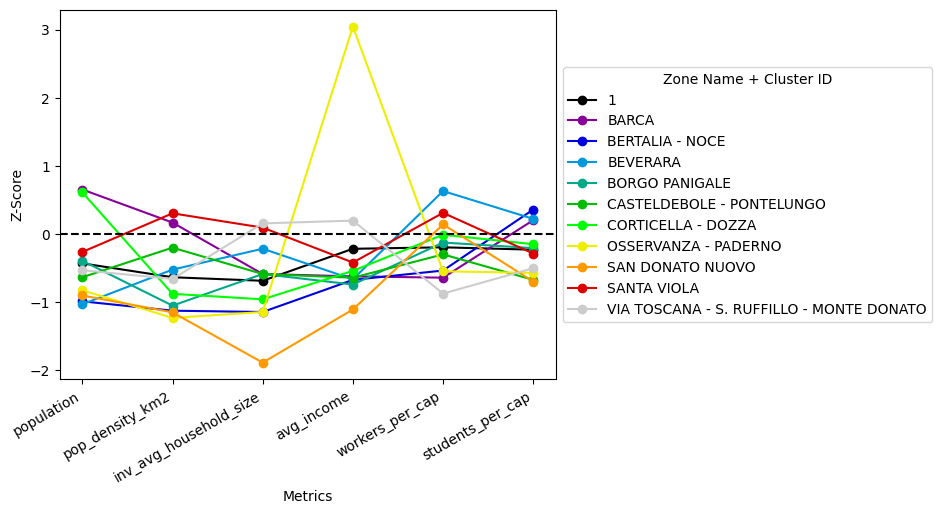

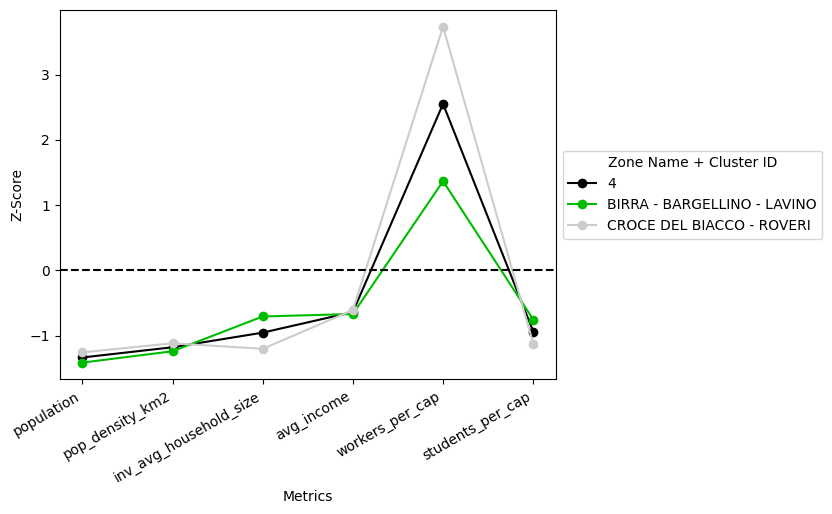

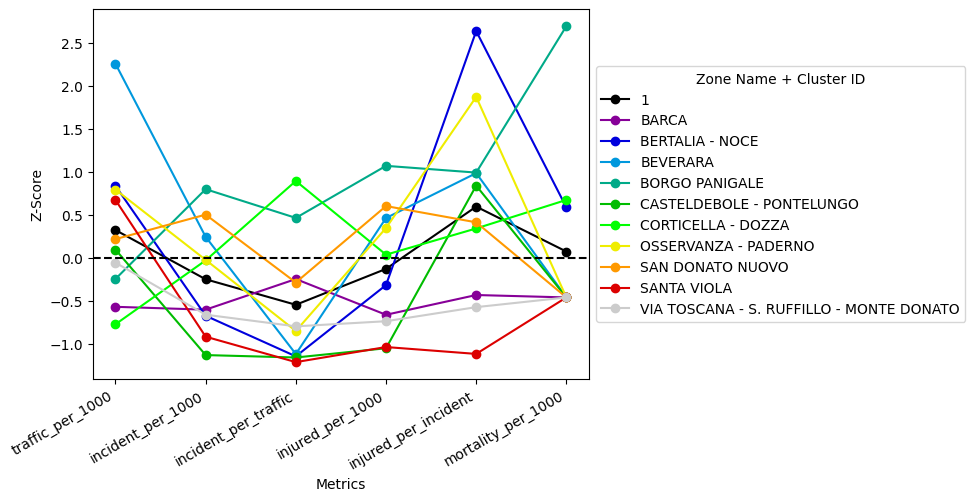

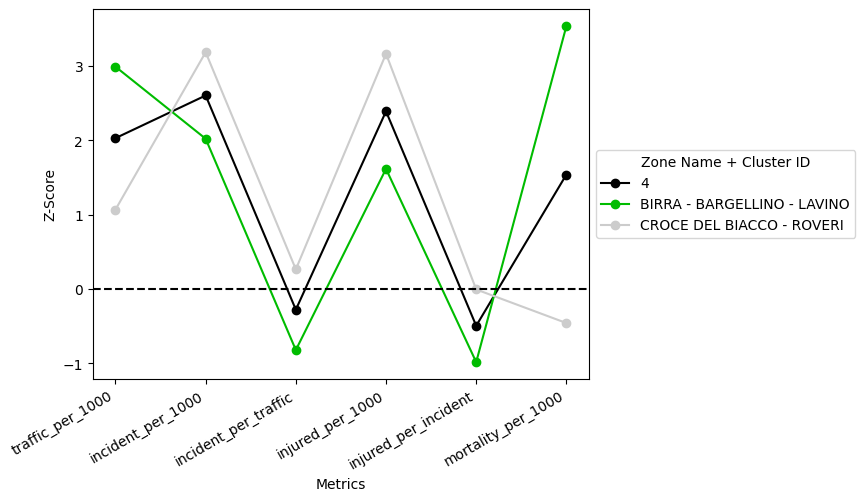

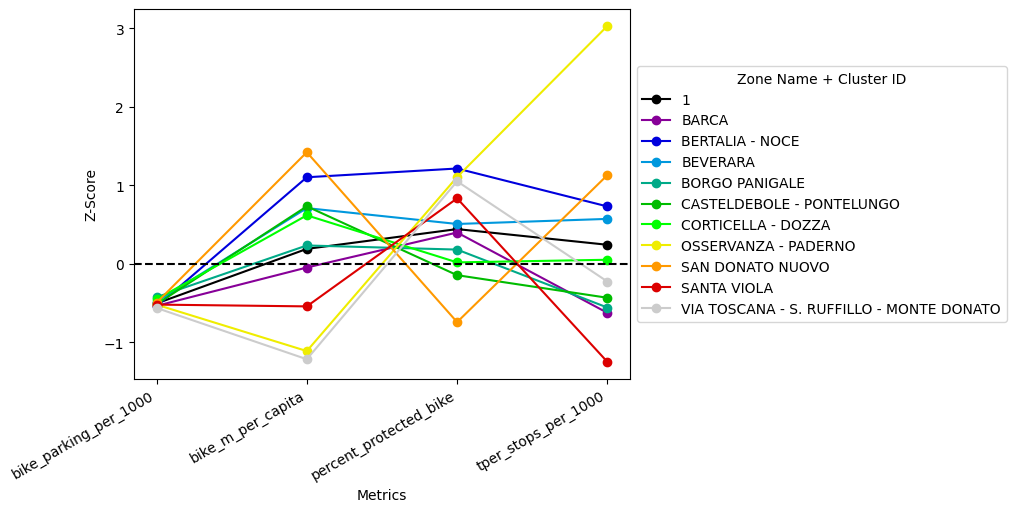

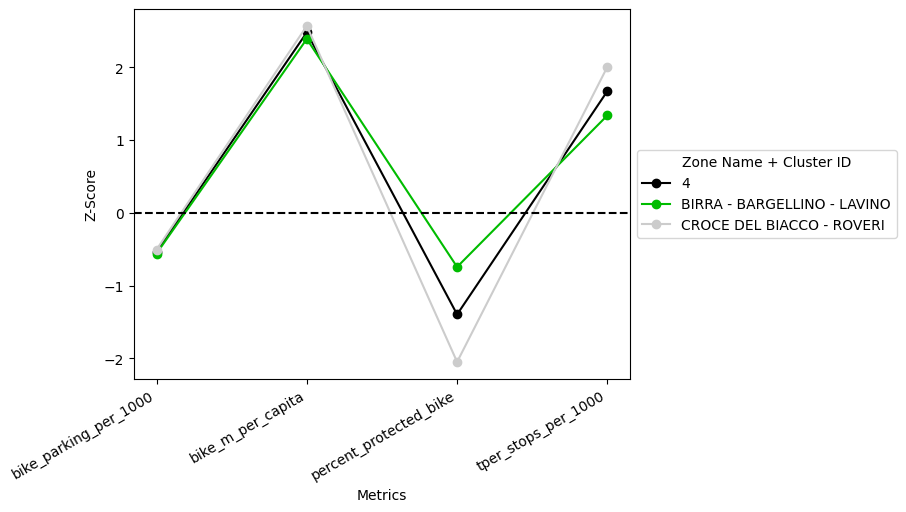

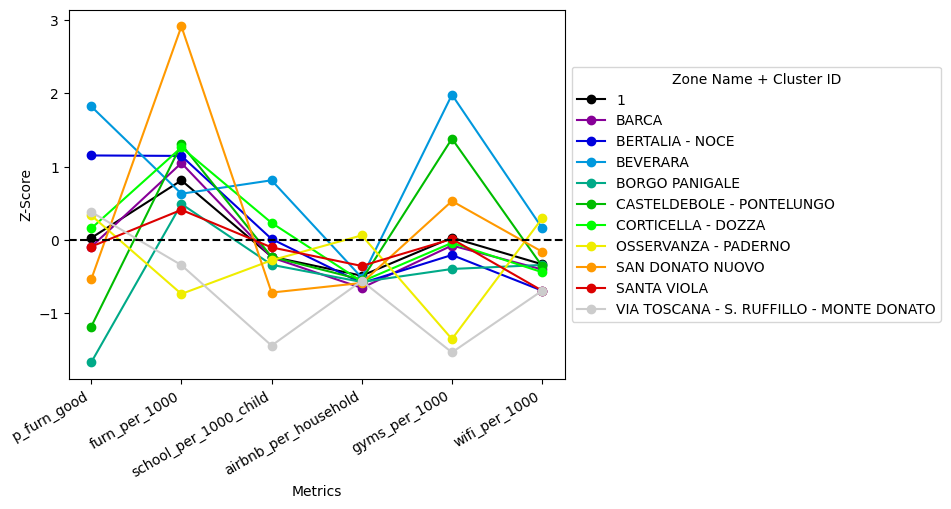

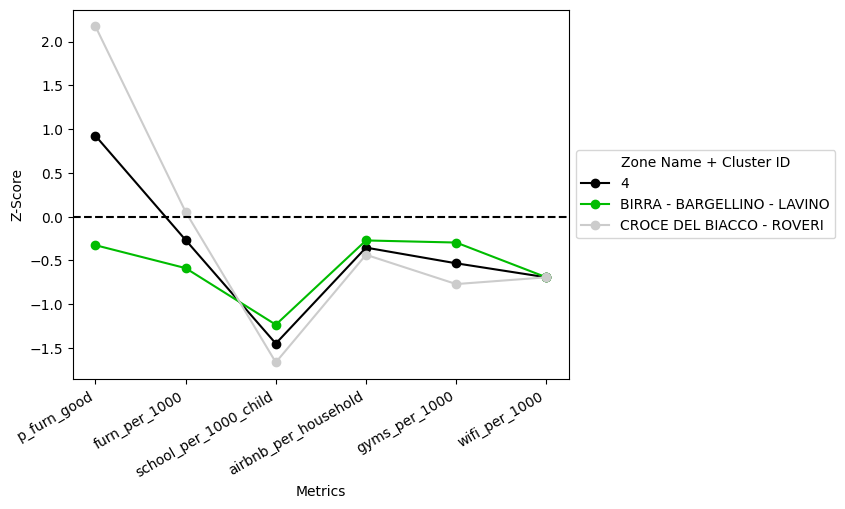

In [42]:
for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
    for id in ['1','4']:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_5, 
                analysis_data = df_z, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_socio_clusters_4 = km_cluster_analysis(df_z_socioecon, 4, base_map_2019)
df_socio_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_socio_clusters_4.centroids

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_socio_clusters_4, 
                analysis_data = df_z_socioecon, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# perform cluster analysis on df_z_transport (transport metrics only) and display results
# screeplot (the "elbow" graph) analysis of this dataset yielded a result that suggested 2 clusters was most meaningful 
df_transport_clusters_4 = km_cluster_analysis(df_z_transport, 4, base_map_2019)
df_transport_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))
# should try to add more transportation related metrics and determine if this creates more meaningful insight

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_transport_clusters_4.centroids

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_transport_clusters_4, 
                analysis_data = df_z_transport, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_amenities_clusters_4 = km_cluster_analysis(df_z_amenities, 4, base_map_2019)
df_amenities_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_amenities_clusters_4, 
                analysis_data = df_z_amenities, 
                cluster_id = id, 
                metrics = metrics_list)

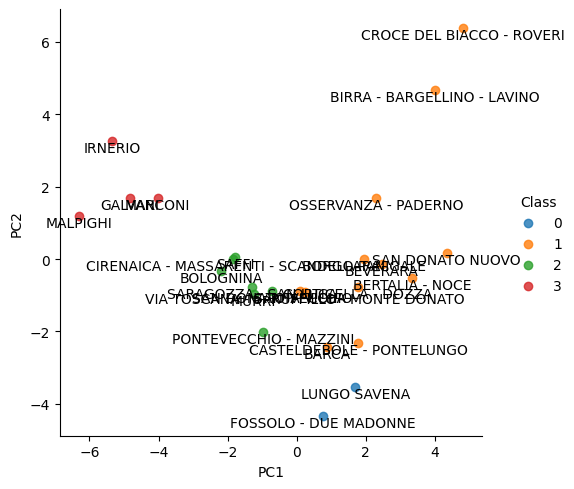

In [29]:
    # principal compoenents analysis
# set the resulting categories of the cluster analysis as dependent variable 
y = df_z_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']].sort_values(by = 'Cluster ID')

# process the dataset to allow cosnsistent labelling of clusters and sensable legend
# joins the cluster IDs to the analyzed dataframe, sorts by the cluster ID given in the k-means cluster analysis, then removes the ID again for the PCA
df_z_pca = df_z.join(df_z_clusters_4.geo[['Cluster ID']]).reset_index().sort_values(by = 'Cluster ID').drop(columns=['Cluster ID']).set_index('zona_fiu')

# define the principal component analysis from the standardized z-score data
pca = PCA().fit(df_z_pca)

# display a scatterplot of the data to show the clusters in comparison to the first two principal components
pca_scatter(pca, df_z_pca, y)
# the PCA analysis and the cluster analysis appear compatible

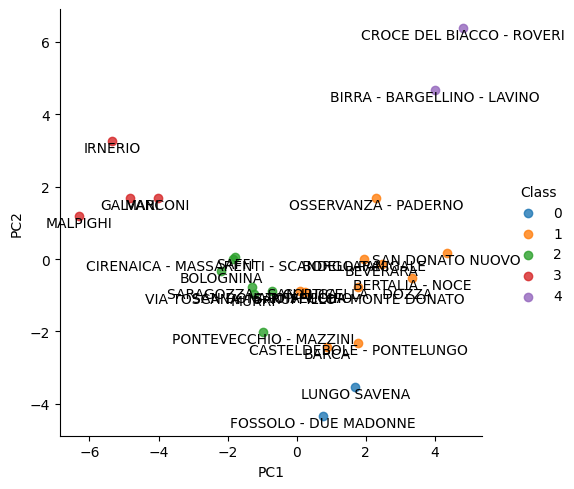

In [43]:
    # principal compoenents analysis
# set the resulting categories of the cluster analysis as dependent variable 
y = df_z_clusters_5.geo.reset_index()[['zona_fiu','Cluster ID']].sort_values(by = 'Cluster ID')

# process the dataset to allow cosnsistent labelling of clusters and sensable legend
# joins the cluster IDs to the analyzed dataframe, sorts by the cluster ID given in the k-means cluster analysis, then removes the ID again for the PCA
df_z_pca = df_z.join(df_z_clusters_5.geo[['Cluster ID']]).reset_index().sort_values(by = 'Cluster ID').drop(columns=['Cluster ID']).set_index('zona_fiu')

# define the principal component analysis from the standardized z-score data
pca = PCA().fit(df_z_pca)

# display a scatterplot of the data to show the clusters in comparison to the first two principal components
pca_scatter(pca, df_z_pca, y)
# the PCA analysis and the cluster analysis appear compatible

In [ ]:
# repeat the analysis with the socioeconomic metrics
y_socioecon = df_socio_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_socioecon = PCA().fit(df_z_socioecon)
pca_scatter(pca_socioecon, df_z_socioecon, y_socioecon)

In [ ]:
# repeat the analysis with the transport metrics
y_transport = df_transport_clusters_3.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_transport = PCA().fit(df_z_transport)
pca_scatter(pca_transport, df_z_transport, y_transport)
# conclusion as of 19/7 - the analysis of the combined dataset is still being driven heavily by the summary statistics 
# removing the summary stats leads to a weak grouping from the transport related metrics into two clusters - interior and exterior
# continue adding metrics

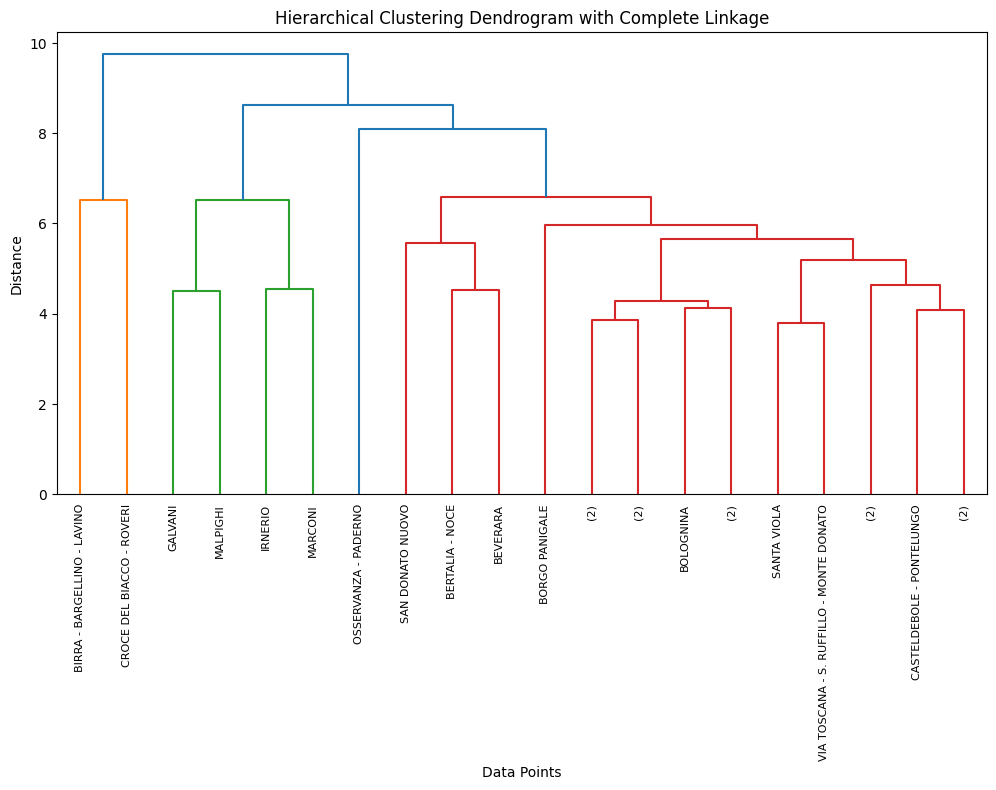

In [30]:
# hierarchical clustering - provides ability to see further granularity and inter-group similarities / differences compared to k-means

# average linkage - compares using average distance between members of each cluster
linkage_matrix = linkage(df_z, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# repeat the hierarchical clustering from above but only with the transport related metrics
linkage_matrix = linkage(df_z_transport, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z_transport.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()